# Food Delivery Cost and Profitability Analysis using Python


Food Delivery Cost and Profitability Analysis is a comprehensive evaluation aimed at understanding and optimizing the financial dynamics of a food delivery operation. The goal is to identify areas where the service can reduce costs, increase revenue, and implement pricing or commission strategies that enhance profitability. 

### Import libraries

In [37]:
import pandas as pd
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("food_order.csv")

In [3]:
df.head()

,Order ID,Customer ID,Restaurant ID,Order Date and Time,Delivery Date and Time,Order Value,Delivery Fee,Payment Method,Discounts and Offers,Commission Fee,Payment Processing Fee,Refunds/Chargebacks
0,1,C8270,R2924,2024-02-01 01:11:52,2024-02-01 02:39:52,1914,0,Credit Card,5% on App,150,47,0
1,2,C1860,R2054,2024-02-02 22:11:04,2024-02-02 22:46:04,986,40,Digital Wallet,10%,198,23,0
2,3,C6390,R2870,2024-01-31 05:54:35,2024-01-31 06:52:35,937,30,Cash on Delivery,15% New User,195,45,0
3,4,C6191,R2642,2024-01-16 22:52:49,2024-01-16 23:38:49,1463,50,Cash on Delivery,None,146,27,0
4,5,C6734,R2799,2024-01-29 01:19:30,2024-01-29 02:48:30,1992,30,Cash on Delivery,50 off Promo,130,50,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Order ID                1000 non-null   int64 
 1   Customer ID             1000 non-null   object
 2   Restaurant ID           1000 non-null   object
 3   Order Date and Time     1000 non-null   object
 4   Delivery Date and Time  1000 non-null   object
 5   Order Value             1000 non-null   int64 
 6   Delivery Fee            1000 non-null   int64 
 7   Payment Method          1000 non-null   object
 8   Discounts and Offers    1000 non-null   object
 9   Commission Fee          1000 non-null   int64 
 10  Payment Processing Fee  1000 non-null   int64 
 11  Refunds/Chargebacks     1000 non-null   int64 
dtypes: int64(6), object(6)
memory usage: 93.9+ KB


In [5]:
df.shape

(1000, 12)

In [6]:
df['order date and time'] = pd.to_datetime(df['Order Date and Time'])
df['delivery date and time']  = pd.to_datetime(df['Delivery Date and Time'])

In [7]:
df.head()

,Order ID,Customer ID,Restaurant ID,Order Date and Time,Delivery Date and Time,Order Value,Delivery Fee,Payment Method,Discounts and Offers,Commission Fee,Payment Processing Fee,Refunds/Chargebacks,order date and time,delivery date and time
0,1,C8270,R2924,2024-02-01 01:11:52,2024-02-01 02:39:52,1914,0,Credit Card,5% on App,150,47,0,2024-02-01 01:11:52,2024-02-01 02:39:52
1,2,C1860,R2054,2024-02-02 22:11:04,2024-02-02 22:46:04,986,40,Digital Wallet,10%,198,23,0,2024-02-02 22:11:04,2024-02-02 22:46:04
2,3,C6390,R2870,2024-01-31 05:54:35,2024-01-31 06:52:35,937,30,Cash on Delivery,15% New User,195,45,0,2024-01-31 05:54:35,2024-01-31 06:52:35
3,4,C6191,R2642,2024-01-16 22:52:49,2024-01-16 23:38:49,1463,50,Cash on Delivery,None,146,27,0,2024-01-16 22:52:49,2024-01-16 23:38:49
4,5,C6734,R2799,2024-01-29 01:19:30,2024-01-29 02:48:30,1992,30,Cash on Delivery,50 off Promo,130,50,0,2024-01-29 01:19:30,2024-01-29 02:48:30


## ETL

let's create a function to extract numeric values from the 'Discounts and Offers' string

In [8]:
def extract_discount(discount_str):
    if "off" in discount_str:#the discount is a fixed amount off (e.g., "10 off")
        return float(discount_str.split(' ')[0])#splits the string by spaces into a list of words.[0] accesses the 1st element
    elif '%' in discount_str:#% off (15% off)
        return float(discount_str.split('%')[0])
    else:
        return 0.0

Apply this function to create new discount cloumn

In [9]:
df['Discount Percentage'] = df['Discounts and Offers'].apply(lambda x: extract_discount(x))

In [10]:
df['Discount Amount'] = df.apply(lambda x: (x['Order Value'] * x['Discount Percentage'] / 100)
                                                   if x['Discount Percentage'] > 1
                                                   else x['Discount Percentage'], axis=1)
#if the discount% is greater than 1 it find the discount amount else print as it is.

In [11]:
# adjust 'Discount Amount' for fixed discounts directly specified in the 'Discounts and Offers' column
df['Discount Amount'] = df.apply(lambda x: x['Discount Amount'] if x['Discount Percentage'] <= 1
                                                   else x['Order Value'] * x['Discount Percentage'] / 100, axis=1)
# Also here i find the dicount amount for fixed discount

In [12]:
print(df[['Order Value', 'Discounts and Offers', 'Discount Percentage', 'Discount Amount']].head(), df.dtypes)

   Order Value Discounts and Offers  Discount Percentage  Discount Amount
0         1914            5% on App                  5.0            95.70
1          986                  10%                 10.0            98.60
2          937         15% New User                 15.0           140.55
3         1463                 None                  0.0             0.00
4         1992         50 off Promo                 50.0           996.00 Order ID                           int64
Customer ID                       object
Restaurant ID                     object
Order Date and Time               object
Delivery Date and Time            object
Order Value                        int64
Delivery Fee                       int64
Payment Method                    object
Discounts and Offers              object
Commission Fee                     int64
Payment Processing Fee             int64
Refunds/Chargebacks                int64
order date and time       datetime64[ns]
delivery date and time 

### Cost and Profitability Analysis


In [18]:
# calculate total costs and revenue per order
df['Total Costs'] = df['Delivery Fee'] + df['Discount Amount'] + df['Payment Processing Fee']
df['Revenue']  = df['Commission Fee']
df['Profit'] = df['Revenue'] - df['Total Costs']


total_orders = df.shape[0]
total_revenue = df['Revenue'].sum()
total_costs = df['Total Costs'].sum()
total_profit = df['Profit'].sum()


overall_metrics = {
    "Total Orders": total_orders,
    "Total Revenue": total_revenue,
    "Total Costs": total_costs,
    "Total Profit": total_profit
}
print(overall_metrics)

{'Total Orders': 1000, 'Total Revenue': 126990, 'Total Costs': 232709.85, 'Total Profit': -105719.85}


Based on the analysis, here are the overall metrics for the food delivery operations:

Total Orders: 1,000

Total Revenue (from Commission Fees): 126,990 INR

Total Costs: 232,709.85 INR (including delivery fees, payment processing fees, and discounts)

Total Profit: -105,719.85 INR

The analysis indicates that the total costs associated with the food delivery operations exceed the total revenue generated from commission fees, resulting in a net loss. It suggests that the current commission rates, delivery fees, and discount strategies might not be sustainable for profitability.

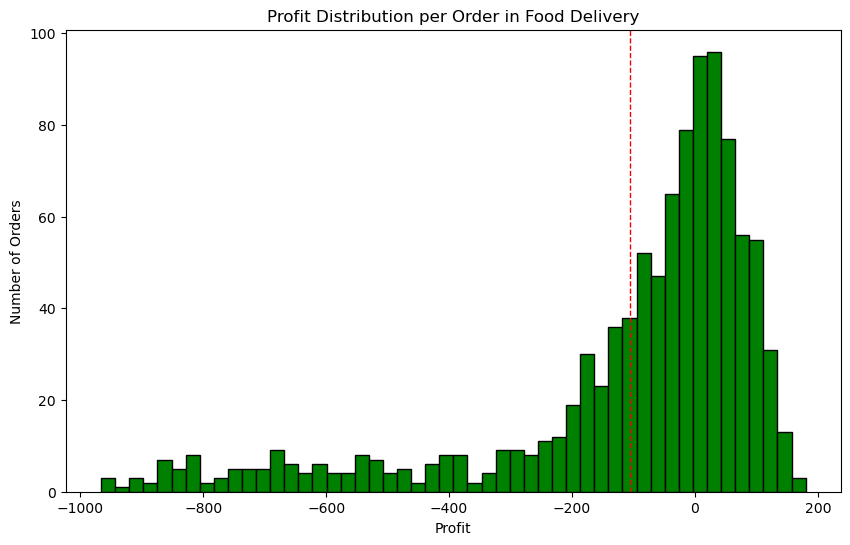

In [19]:
import matplotlib.pyplot as plt

# histogram of profits per order
plt.figure(figsize=(10, 6))
plt.hist(df['Profit'], bins=50, color='green', edgecolor='black')
plt.title('Profit Distribution per Order in Food Delivery')
plt.xlabel('Profit')
plt.ylabel('Number of Orders')
plt.axvline(df['Profit'].mean(), color='red', linestyle='dashed', linewidth=1)
plt.show()

More number of orders resulting in a loss (profits below 0). The red dashed line indicates the average profit, which is in the negative territory, highlighting the overall loss-making situation.

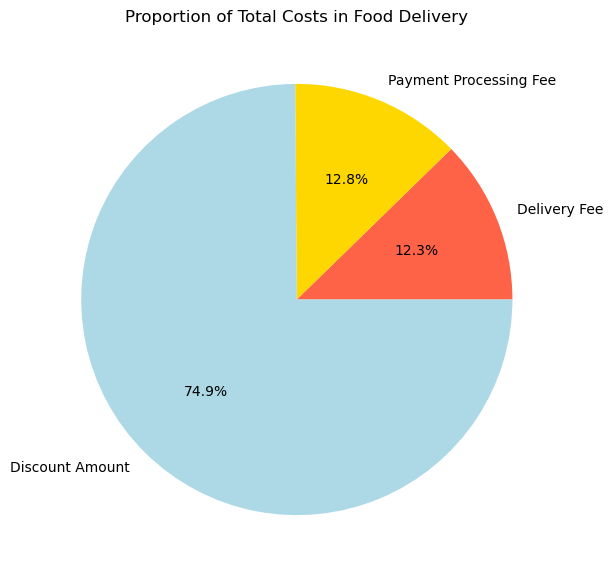

In [24]:
total_costs_of_order = df[['Delivery Fee', 'Payment Processing Fee', 'Discount Amount']].sum()
plt.figure(figsize=(7,7))
plt.pie(total_costs_of_order,labels = total_costs_of_order.index, autopct = '%1.1f%%',colors=['tomato', 'gold', 'lightblue'])
plt.title('Proportion of Total Costs in Food Delivery')
plt.show()

Discounts is a significant portion of the costs, suggesting that promotional strategies might be heavily impacting overall profitability.

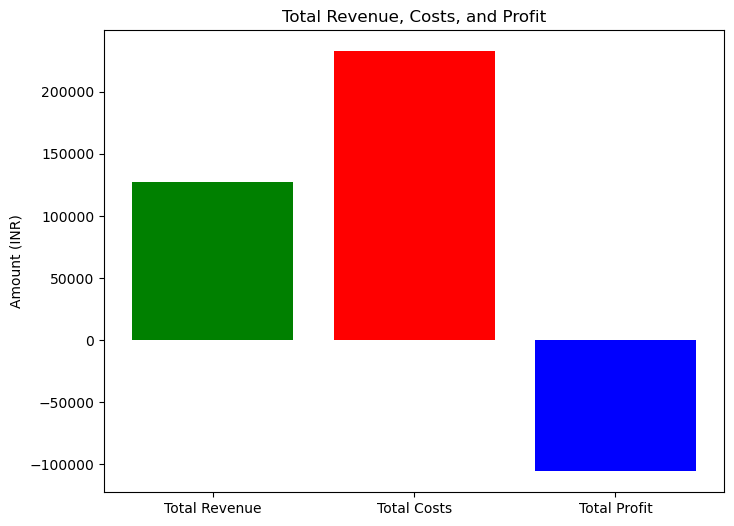

In [25]:
# bar chart for total revenue, costs, and profit
totals = ['Total Revenue', 'Total Costs', 'Total Profit']
values = [total_revenue, total_costs, total_profit]

plt.figure(figsize=(8, 6))
plt.bar(totals, values, color=['green', 'red', 'blue'])
plt.title('Total Revenue, Costs, and Profit')
plt.ylabel('Amount (INR)')
plt.show()

## New Strategy for Profits

From the analysis so far we understood that the discounts on food orders are resulting in huge losses. Now, we need to find a new strategy for profitability

1. A new average commission percentage(AC %) based on profitable orders.
 
2. A new average discount percentage(AD %) for profitable orders, that could serve as a guideline for what level of discount still allows for profitability.

In [38]:
profitable_orders = df[df['Profit'] > 0]

# calculate the average commission percentage for profitable orders
profitable_orders['Commission Percentage'] = (profitable_orders['Commission Fee'] / profitable_orders['Order Value']) * 100

# calculate the average discount percentage for profitable orders
profitable_orders['Average Discount Percentage'] = (profitable_orders['Discount Amount'] / profitable_orders['Order Value']) * 100

# the new averages
new_avg_commission_percentage = profitable_orders['Commission Percentage'].mean()
new_avg_discount_percentage = profitable_orders['Average Discount Percentage'].mean()

print(f'new_avg_commission_percentage: {new_avg_commission_percentage}, new_avg_discount_percentagez:{new_avg_discount_percentage}')


new_avg_commission_percentage: 30.508436145149446, new_avg_discount_percentagez:5.867469879518072


# Summary

this is how you can analyze the cost and profitability of a food delivery company. Food Delivery Cost and Profitability Analysis involves examining all the costs associated with delivering food orders, from direct expenses like delivery fees and packaging to indirect expenses like discounts offered to customers and commission fees paid by restaurants. By juxtaposing these costs against the revenue generated (primarily through order values and commission fees), the analysis aims to provide insights into how profitable the food delivery service is on a per-order basis.